Import Modules

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import librosa
import os
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Load Data

In [40]:
paths = []
labels = []


for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0]
        if label == 'ps':
            labels.append('surprise')
        else:
            labels.append(label)


In [41]:
# creating a dataframe
df = pd.DataFrame()
df['path'] = paths
df['emotion'] = labels
df.head()

,path,emotion
0,./data\OAF_angry\OAF_back_angry.wav,angry
1,./data\OAF_angry\OAF_bar_angry.wav,angry
2,./data\OAF_angry\OAF_base_angry.wav,angry
3,./data\OAF_angry\OAF_bath_angry.wav,angry
4,./data\OAF_angry\OAF_bean_angry.wav,angry


In [42]:
df['emotion'].value_counts()

emotion
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='emotion', ylabel='count'>

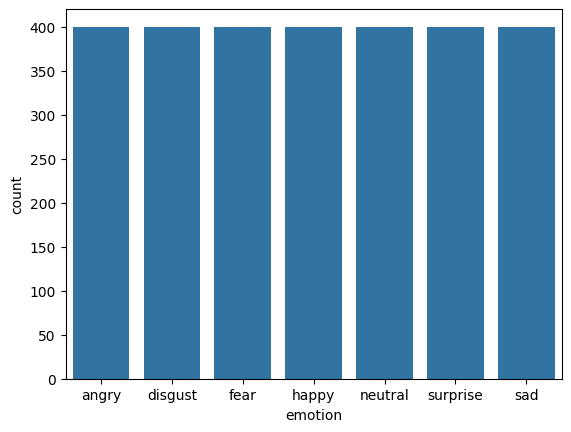

In [43]:
sns.countplot(data=df, x='emotion') # the dataset is balanced

In [44]:
def waveplot(data, sample_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()


def spectogram(data, sample_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar


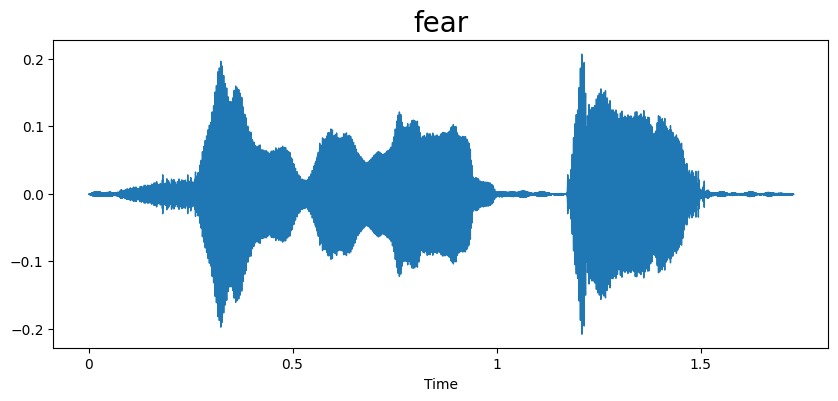

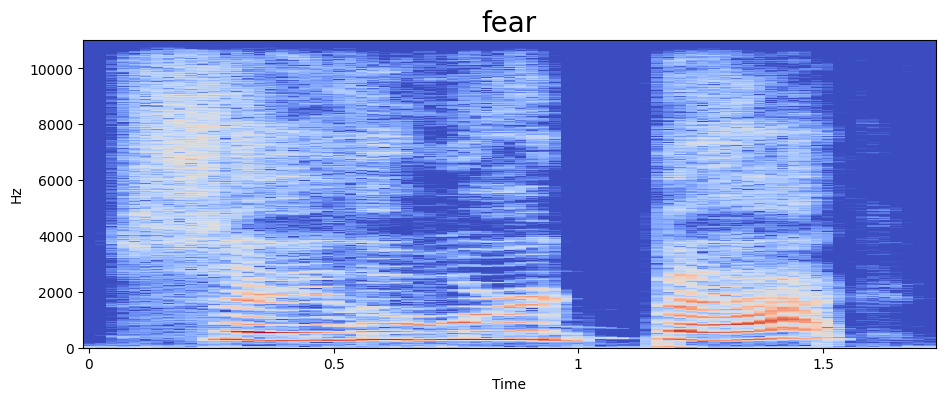

In [45]:
# Filters the DataFrame to get only the rows where the 'emotion' column matches the specified emotion value.
emotion = 'fear'
p = df['path'][df['emotion']==emotion].iloc[0]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(p)

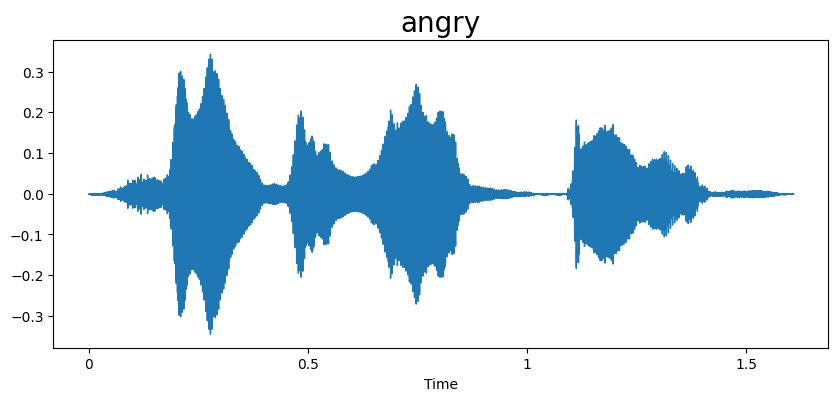

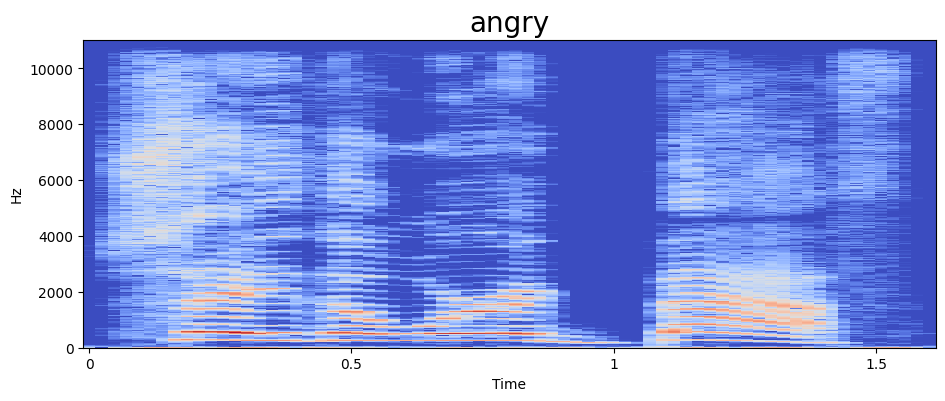

In [46]:
# Filters the DataFrame to get only the rows where the 'emotion' column matches the specified emotion value.
emotion = 'angry'
p = df['path'][df['emotion']==emotion].iloc[3]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(p)

### Feature Extraction